In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Data
a=["date","Appliances","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","RH_out","Windspeed","Visibility","rv1","rv2"]
#load the datasets
df = pd.read_csv("dataset.csv",usecols=a,nrows=677)
df["date1"]=(df['date'].str.split(':').str[0])
del a[0]
table = pd.pivot_table(df,index=["date1"],
               values = a,
               aggfunc=[np.sum],fill_value=0)

In [3]:

y = np.array(table[("sum",'Appliances')])
del table[("sum","Appliances")]
X = np.array(table.values.tolist())

In [5]:
##boston=datasets.load_boston()
##X,y=shuffle(boston.data,boston.target,random_state=13)
##X=X.astype(np.float32)
##offset=int(X.shape[0]*0.9)
##X_train,y_train=X[:offset],y[:offset]
##X_test,y_test=X[offset:],y[offset:]

#Fit Regression Model

params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'squared_error'}
clf=ensemble.GradientBoostingRegressor(**params)

clf.fit(X,y)
mse=mean_squared_error(y,clf.predict(X))
print("MSE:%.4f" % mse)

MSE:3247.7324


/Users/pru/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Deviance')

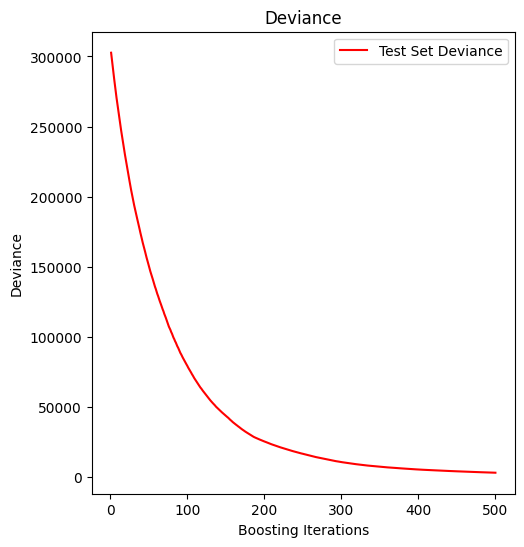

In [6]:
#Plot Training Deviance

# compute test set deviance
test_score=np.zeros((params['n_estimators'],), dtype=np.float64)

for i,y_pred in enumerate(clf.staged_predict(X)):
    test_score[i]=clf.loss_(y,y_pred)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Deviance')
##plt.plot(np.arange(params['n_estimators'])+1,clf.train_score_,'b-',
##         label='Training Set Deviance')
##plt.plot(np.arange(params['n_estimators'])+1, clf.train_score_,'b-',
##         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators'])+1,test_score,'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
# plt.show()

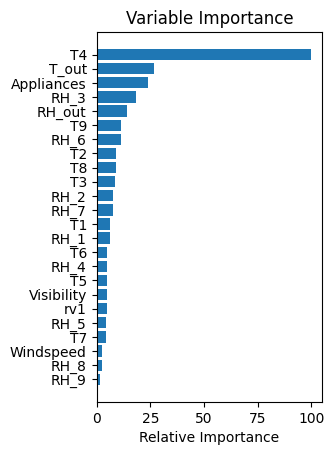

In [22]:
#Plot Feature Importance
feature_importance=clf.feature_importances_
# make importances relative to max importance
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])
plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(a)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()